# **Tugas 2 Data Understanding**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  
#### 1. Pengantar Outlier dalam Data Understanding
Outlier adalah data yang memiliki nilai yang jauh berbeda dibandingkan dengan sebagian besar data dalam suatu kumpulan. Keberadaannya bisa disebabkan oleh berbagai faktor, seperti kesalahan dalam pengukuran, kesalahan saat memasukkan data, atau memang karena adanya kejadian langka. Saat memahami data (Data Understanding), mendeteksi outlier menjadi langkah penting karena dapat memengaruhi hasil analisis, pemodelan, dan pengambilan keputusan. Jika outlier tidak terdeteksi, model statistik atau machine learning bisa menjadi bias, kurang akurat, atau bahkan gagal memberikan hasil yang valid.

#### 2. Konsep K-Nearest Neighbors (KNN) dalam Deteksi Outlier
K-Nearest Neighbors (KNN) adalah algoritma berbasis kedekatan yang sering digunakan untuk klasifikasi dan regresi. Namun, KNN juga dapat dimanfaatkan dalam deteksi outlier dengan mengukur seberapa jauh suatu titik data dari tetangga terdekatnya. Berikut adalah konsep dasar KNN dalam deteksi outlier:


*   Prinsip Kerja KNN:



KNN menghitung jarak antara suatu titik data dengan titik-titik data lain di sekitarnya. Titik data yang memiliki jarak jauh dari sebagian besar tetangganya dianggap sebagai outlier.
Secara matematis, KNN mengukur jarak (misalnya, Euclidean, Manhattan, atau Minkowski) antara titik data dan k-tetangga terdekatnya. Jika jarak rata-rata ke k-tetangga terdekat tersebut lebih besar dari ambang batas tertentu, titik data tersebut dianggap sebagai outlier.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
K-Nearest Neighbors (KNN) dapat digunakan untuk mendeteksi outlier dalam berbagai situasi, tetapi lebih efektif dalam kondisi tertentu. Berikut adalah beberapa skenario di mana KNN cocok digunakan untuk deteksi outlier:

Ketika Data Tidak Berasumsi Distribusi Tertentu
KNN adalah metode berbasis kedekatan yang tidak bergantung pada asumsi distribusi data, seperti normal atau Gaussian.
Jika dataset memiliki pola distribusi yang tidak diketahui atau tidak mengikuti distribusi tertentu, KNN bisa menjadi pilihan yang baik untuk mendeteksi outlier.

Ketika Dataset Tidak Terlalu Besar
KNN memerlukan perhitungan jarak antara setiap titik data, sehingga kurang efisien untuk dataset yang sangat besar.
Jika dataset berukuran kecil hingga menengah, KNN dapat bekerja dengan baik karena masih dapat menangani perhitungan jarak dengan cepat.

Saat Data Berupa Data Numerik dan Berbasis Jarak
KNN bekerja dengan menghitung jarak antara titik-titik data, sehingga lebih cocok untuk data numerik.
Jika data berbentuk kategori, perlu dikonversi ke bentuk numerik atau menggunakan metrik jarak yang sesuai.


#### Kesimpulan
K-Nearest Neighbors (KNN) adalah metode berbasis jarak yang dapat digunakan untuk mendeteksi outlier dengan mengukur kedekatan suatu titik terhadap tetangga terdekatnya. KNN cocok digunakan ketika dataset berukuran kecil hingga menengah, tidak memiliki asumsi distribusi tertentu, dan outlier dapat diidentifikasi berdasarkan jarak.

Namun, KNN kurang efisien untuk dataset yang sangat besar atau berdimensi tinggi karena memerlukan banyak perhitungan jarak. Selain itu, jika outlier tidak dapat dideteksi hanya berdasarkan jarak, metode lain seperti DBSCAN, Isolation Forest, atau Autoencoder mungkin lebih efektif. Oleh karena itu, pemilihan metode deteksi outlier harus disesuaikan dengan karakteristik dataset dan tujuan analisis.

In [36]:
%pip install pymysql
%pip install psycopg2

#### Koneksi dan Analisis

- Menghubungkan ke Database
  - Menggunakan psycopg2 untuk PostgreSQL atau pymysql untuk MySQL guna mengakses database.  

- Mengambil & Mengolah Data  
  - Menggunakan pandas untuk membaca data dari database atau file.  
  - Menggunakan numpy untuk melakukan perhitungan matematis.  

- Visualisasi Data  
  - Menggunakan seaborn dan matplotlib untuk menyajikan data dalam bentuk grafik.  

- Deteksi Outlier dengan LOF  
  - Memanfaatkan jarak Euclidean untuk mengukur kedekatan antar titik data.  
  - Menggunakan NearestNeighbors untuk mencari tetangga terdekat.  
  - Menghitung Local Outlier Factor (LOF) guna mengidentifikasi titik yang berpotensi sebagai outlier.

In [37]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

#### Koneksi ke Database PostgreSQL
 Menggunakan psycopg2.connect() untuk membuat koneksi ke database PostgreSQL.

Parameter koneksi:

host → Alamat server database.

user → Nama pengguna database.

password → Kata sandi database.

database → Nama database yang akan diakses.

port → Port yang digunakan untuk koneksi PostgreSQL.

In [38]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-349c0f6d-posgresqlsilvia.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_EribuBMoRkDuBfKtYVP",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Koneksi ke Database MySQL
Menggunakan pymysql.connect() untuk membuat koneksi ke database MySQL.

Parameter koneksi:

host → Alamat server database.

user → Nama pengguna database.

password → Kata sandi database.

database → Nama database yang akan diakses.

port → Port koneksi MySQL.

In [39]:
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-397b65f2-posgresqlsilvia.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_TZ0J8yRi7GrNiHAIr19",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Deteksi Outlier dengan KNN
Kode ini bertujuan untuk mengambil data dari PostgreSQL dan MySQL, menggabungkannya, lalu mengidentifikasi outlier menggunakan metode K-Nearest Neighbors (KNN).

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
  2     Iris-setosa          14.0          2.0          40.9         30.0     17.746135     True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.247029    False
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.556602     True
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.191277    False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.360018    False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.308980    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.317776    False
 10     Iris-setosa           

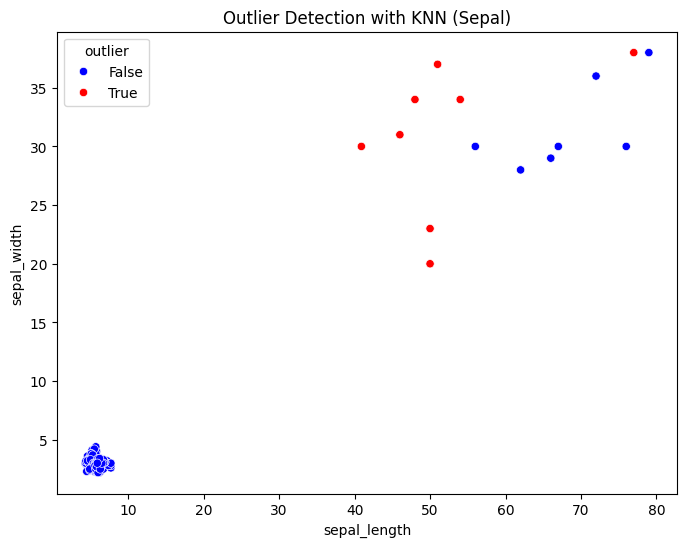

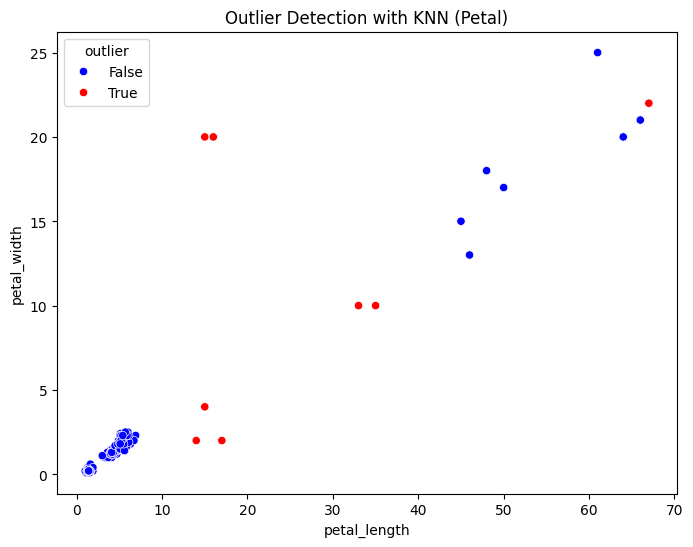

In [40]:
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()

#### Total outlier

In [41]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 8


In [42]:
# Menyaring data yang terdeteksi sebagai outlier
# Kemudian mengurutkannya berdasarkan nilai "knn_distance" dari yang terbesar
outliers = df_merged[df_merged["outlier"]].sort_values(by="knn_distance", ascending=False)

# Menampilkan daftar outlier teratas dalam format yang lebih rapi
print("Outlier Teratas:")
print(outliers.to_string(index=False))

Outlier Teratas:
 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  2     Iris-setosa          14.0          2.0          40.9         30.0     17.746135     True
 61 Iris-versicolor          35.0         10.0          50.0         20.0     17.373225     True
 94 Iris-versicolor          33.0         10.0          50.0         23.0     16.800181     True
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.556602     True
 12     Iris-setosa          16.0         20.0          48.0         34.0     16.371222     True
 21     Iris-setosa          17.0          2.0          54.0         34.0     15.904666     True
 22     Iris-setosa          15.0          4.0          51.0         37.0     15.115576     True
118  Iris-virginica          67.0         22.0          77.0         38.0     13.853855     True


In [43]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="knn_distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 10     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 35     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 38     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
 40     Iris-setosa           1.5          0.2           5.1          3.4      0.139494    False
 18     Iris-setosa           1.4          0.3           5.1          3.5      0.152207    False
 28     Iris-setosa           1.5          0.2           5.2          3.5      0.164215    False
 29     Iris-setosa           1.4          0.2           5.2          3.4      0.164215    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
 31     Iris-setosa           

#### Memisahkan outlier dari data

In [44]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-349c0f6d-posgresqlsilvia.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_EribuBMoRkDuBfKtYVP",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-397b65f2-posgresqlsilvia.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_TZ0J8yRi7GrNiHAIr19",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa          15.0         20.0          46.0         31.0             -1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini mendeteksi dan memisahkan outlier dari dataset PostgreSQL dan MySQL. Data dari kedua sumber digabungkan berdasarkan id dan class. Hanya fitur numerik yang digunakan untuk deteksi outlier dengan model Local Outlier Factor (LOF, n_neighbors=90). Data normal diberi label 1, sedangkan outlier diberi label -1. Dataset kemudian dipisahkan menjadi data normal (df_filtered) dan outlier (outliers). Kode ini menampilkan jumlah outlier dan data setelah pembersihan untuk meningkatkan kualitas analisis dan model machine learning.

#### Menghitung Akurasi Data

In [45]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Akurasi tanpa outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



Kode ini membandingkan akurasi model K-Nearest Neighbors (KNN) pada dataset dengan dan tanpa outlier. LOF diterapkan untuk mendeteksi outlier, lalu dataset dipisahkan. Data dibagi menjadi 80% pelatihan dan 20% pengujian. Model KNN (n_neighbors=11) diterapkan dengan standarisasi data. Hasilnya menunjukkan akurasi dan classification report, di mana model tanpa outlier biasanya lebih akurat karena outlier mengganggu perhitungan jarak.

Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



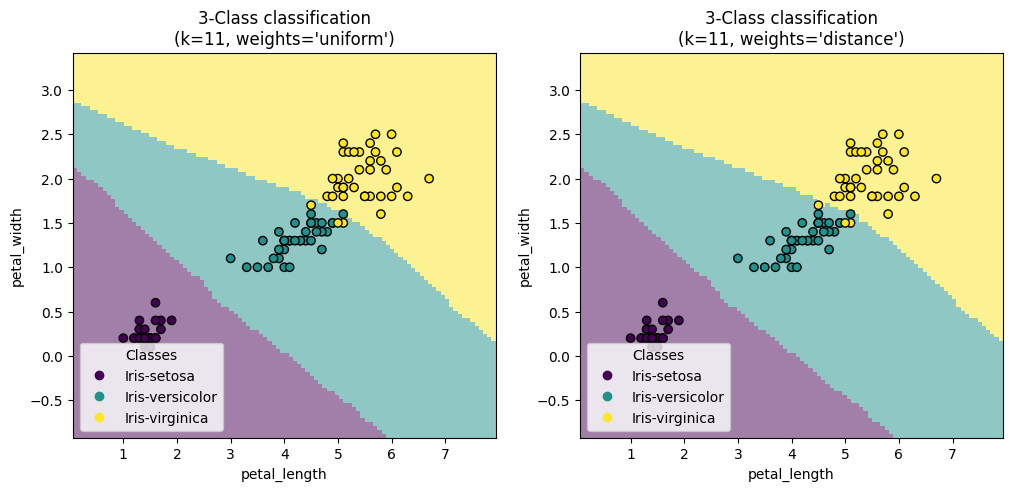

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.8148148148148148
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.75      0.43      0.55         7
 Iris-virginica       0.64      0.88      0.74         8

       accuracy                           0.81        27
      macro avg       0.80      0.77      0.76        27
   weighted avg       0.83      0.81      0.80        27



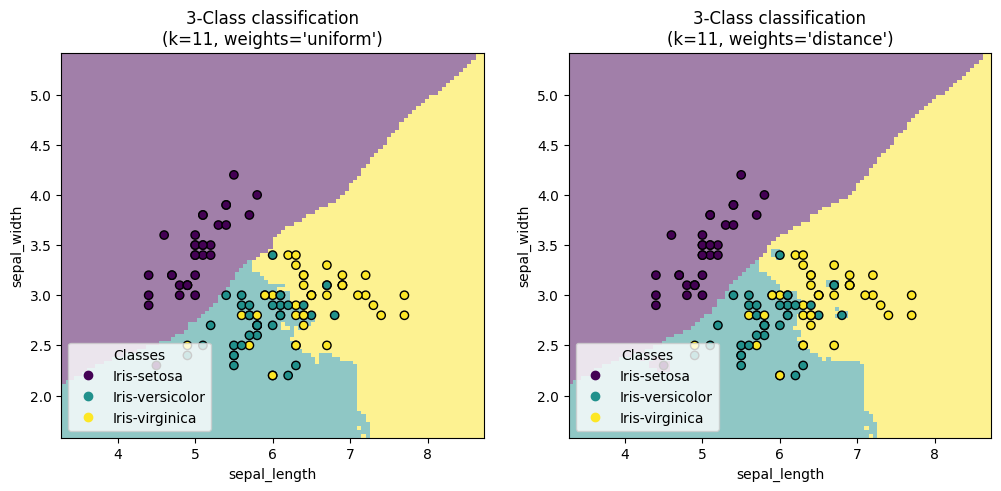

In [47]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

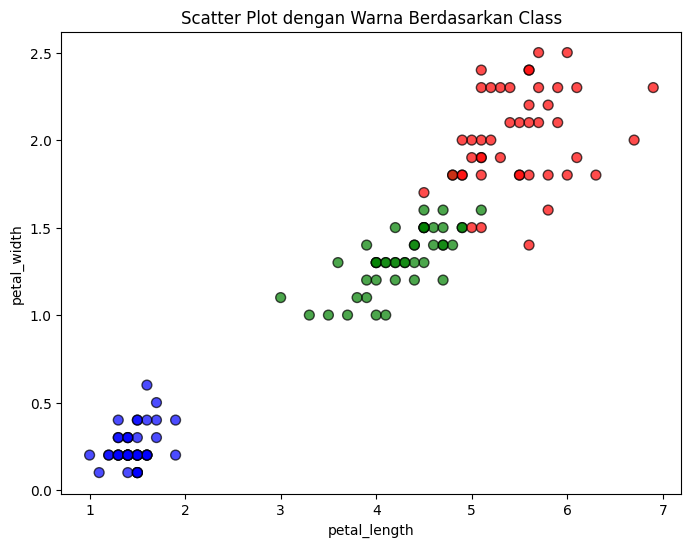

In [48]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

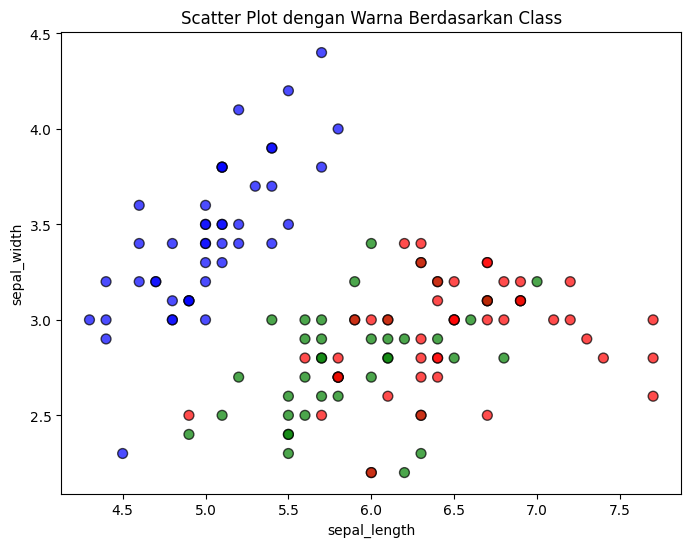

In [49]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal_length"
y_feature = "sepal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

#### Implementasi naive bayes pada data iris

Number of mislabeled points with outliers out of a total 30 points : 20
Accuracy with outliers: 33.33%
Mislabeled points with outliers:
Index: 1, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 2, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 5, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 7, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 10, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 11, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 12, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 13, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 14, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 16, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 19, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 20, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 21, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 22, True Label: Iris-set

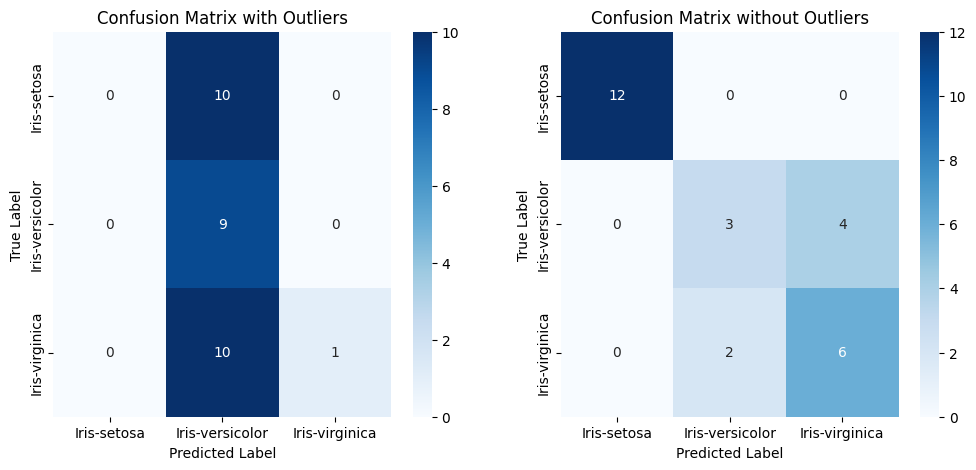

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_merged sudah ada dari kode sebelumnya

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
df_merged["class_encoded"] = label_encoder.fit_transform(df_merged["class"])

# Data dengan outlier
X_all = df_merged[feature_columns]
y_all = df_merged["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Data tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Split data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Split data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
gnb = GaussianNB()

# Latih dan uji model dengan outlier
y_pred_all = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
mislabeled_all = (y_test_all != y_pred_all).sum()
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Number of mislabeled points with outliers out of a total %d points : %d" % (X_test_all.shape[0], mislabeled_all))
print("Accuracy with outliers: %.2f%%" % (accuracy_all * 100))

# Menampilkan label yang salah pada data dengan outlier
mislabeled_indices_all = np.where(y_test_all != y_pred_all)[0]
print("Mislabeled points with outliers:")
for i in mislabeled_indices_all:
    true_label = label_encoder.inverse_transform([int(y_test_all[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_all[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")
print()
# Latih dan uji model tanpa outlier
y_pred_clean = gnb.fit(X_train_clean, y_train_clean).predict(X_test_clean)
mislabeled_clean = (y_test_clean != y_pred_clean).sum()
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Number of mislabeled points without outliers out of a total %d points : %d" % (X_test_clean.shape[0], mislabeled_clean))
print("Accuracy without outliers: %.2f%%" % (accuracy_clean * 100))

# Menampilkan label yang salah pada data tanpa outlier
mislabeled_indices_clean = np.where(y_test_clean != y_pred_clean)[0]
print("Mislabeled points without outliers:")
for i in mislabeled_indices_clean:
    true_label = label_encoder.inverse_transform([int(y_test_clean[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_clean[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_all, y_pred_all), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix with Outliers")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix without Outliers")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()